In [1]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [2]:
dfTrial = pd.read_csv('../data/trialPromoResults.csv', index_col='index')
dfCust = pd.read_csv('../data/custdatabase.csv', index_col='index')
dfActual = pd.read_csv('../data/Cust_Actual.csv', index_col='index')
dfTrain = pd.read_csv('../data/Train.csv', index_col='index')
dfTarget = pd.read_csv('../data/shortlisted.csv', index_col='index')

In [3]:
dfTarget.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,decision
index,,,,,,,,,,
1004,F,divorced,25.02,1,legal,postgrad,10136.44,26690.01,4143.04,B
1009,F,married,44.65,2,IT,tertiary,5825.72,22830.97,1196.25,A
1012,F,married,39.61,0,legal,secondary,4836.80,19294.20,832.48,A
1018,F,married,39.11,1,legal,postgrad,12563.13,29157.55,5941.43,A
1031,M,married,45.44,1,government,tertiary,3970.17,16069.47,526.99,A


In [4]:
dfTrain.columns

Index(['sex', 'mstatus', 'age', 'children', 'occupation', 'education',
       'income', 'avbal', 'avtrans', 'status', 'p_score'],
      dtype='object')

In [5]:
dfTrain.describe()

,age,children,income,avbal,avtrans,p_score
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,40.701337,0.915500,5308.354605,22321.316500,1932.156740,3.358550
std,14.074204,1.052681,3307.480857,11872.049604,1318.799637,0.860609
min,18.020000,0.000000,356.970000,88.000000,8.940000,1.400000
25%,28.530000,0.000000,2647.057500,13489.815000,993.750000,2.700000
50%,39.685000,1.000000,4669.165000,20276.015000,1583.885000,3.200000
75%,48.035000,2.000000,7208.450000,29826.920000,2500.380000,3.900000
max,89.820000,4.000000,19955.570000,88682.430000,8789.100000,7.100000


In [6]:
dfTrain = dfTrain.sort_values(by=['p_score'])

In [7]:
dfTrain.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status,p_score
index,,,,,,,,,,,
3085,F,widowed,84.12,1,retired,secondary,692.33,3542.30,667.19,None,1.4
3717,F,married,65.04,2,retired,secondary,1509.65,2366.30,284.93,None,1.5
4638,M,widowed,89.79,1,retired,secondary,889.28,2854.65,836.53,None,1.5
1381,F,widowed,68.59,1,retired,postgrad,2805.67,4519.43,218.95,None,1.6
2526,F,widowed,85.47,1,retired,secondary,591.67,9476.36,730.47,None,1.6


In [17]:
dfTrain.columns

Index(['sex', 'mstatus', 'age', 'children', 'occupation', 'education',
       'income', 'avbal', 'avtrans', 'status', 'p_score'],
      dtype='object')

# Plots

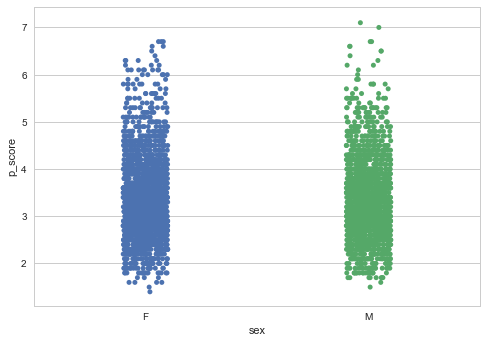

In [36]:
sns.stripplot(x="sex", y="p_score", data=dfTrain, jitter=True)

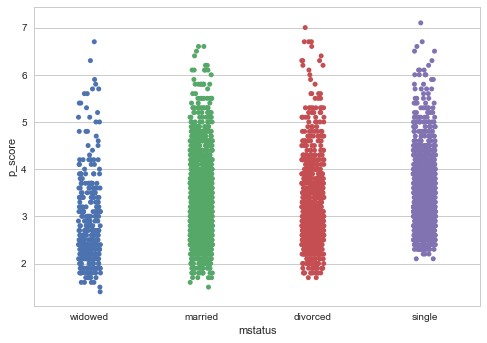

In [35]:
sns.stripplot(x="mstatus", y="p_score", data=dfTrain, jitter=True)

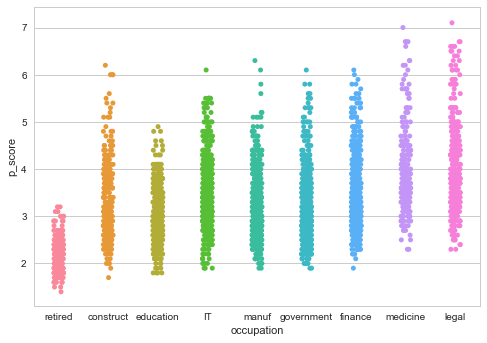

In [34]:
sns.stripplot(x="occupation", y="p_score", data=dfTrain, jitter=True)

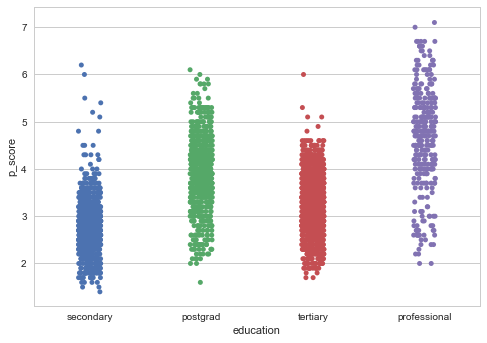

In [40]:
sns.stripplot(x="education", y="p_score", data=dfTrain, jitter=True)

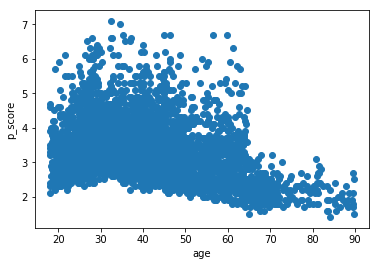

In [9]:
# Plot input data
plt.figure()
plt.scatter(dfTrain.loc[:,'age'], dfTrain.loc[:,'p_score'])
plt.xlabel('age')
plt.ylabel('p_score')
plt.show()

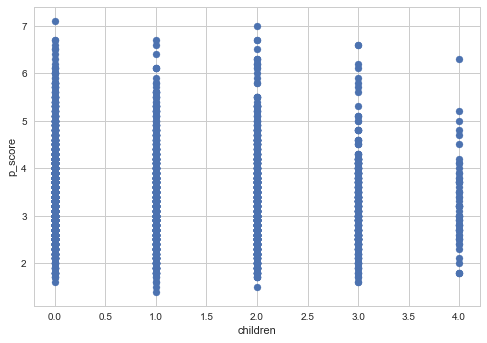

In [45]:
# Plot input data
plt.figure()
plt.scatter(dfTrain.loc[:,'children'], dfTrain.loc[:,'p_score'])
plt.xlabel('children')
plt.ylabel('p_score')
plt.show()

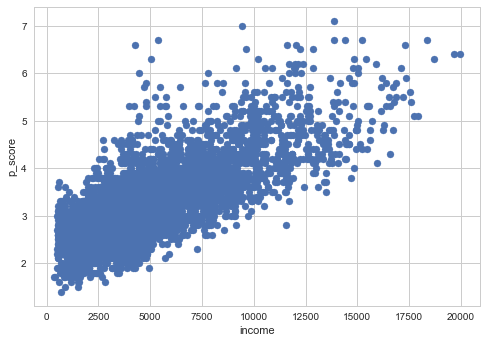

In [47]:
# Plot input data
plt.figure()
plt.scatter(dfTrain.loc[:,'income'], dfTrain.loc[:,'p_score'])
plt.xlabel('income')
plt.ylabel('p_score')
plt.show()

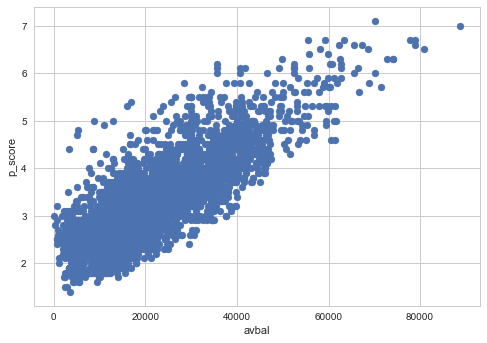

In [48]:
# Plot input data
plt.figure()
plt.scatter(dfTrain.loc[:,'avbal'], dfTrain.loc[:,'p_score'])
plt.xlabel('avbal')
plt.ylabel('p_score')
plt.show()

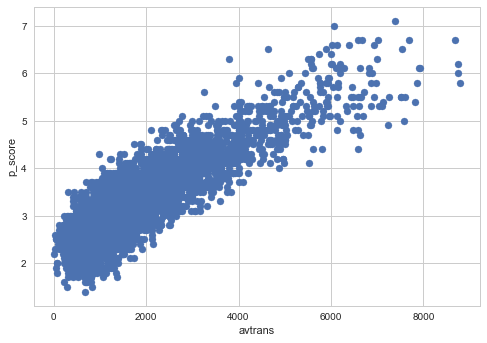

In [49]:
# Plot input data
plt.figure()
plt.scatter(dfTrain.loc[:,'avtrans'], dfTrain.loc[:,'p_score'])
plt.xlabel('avtrans')
plt.ylabel('p_score')
plt.show()

# Fuzzy 
## Transfrom categorical to numerical

In [50]:
dfTrain['mstatus_c'] = dfTrain['mstatus'].map({'widowed': 0, 'married': 1, 'divorced': 2, 'single': 3})
dfTrain['occupation_c'] = dfTrain['occupation'].map({'retired': 0, 'education': 1, 'construct': 2, 'IT': 3, \
                                               'manuf': 4, 'government': 5, 'finance': 6, 'medicine': 8, 'legal': 9})
dfTrain['education_c'] = dfTrain['education'].map({'secondary': 0, 'tertiary': 1, 'postgrad': 2, 'professional': 3})

## define fuzzy variables

In [60]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
mstatus = ctrl.Antecedent(dfTrain['mstatus_c'], 'mstatus')
age = ctrl.Antecedent(dfTrain['age'], 'age')
children = ctrl.Antecedent(dfTrain['children'], 'children')
occupation = ctrl.Antecedent(dfTrain['occupation_c'], 'occupation')
education = ctrl.Antecedent(dfTrain['education_c'], 'education')
income = ctrl.Antecedent(dfTrain['income'], 'income')
avbal = ctrl.Antecedent(dfTrain['avbal'], 'avbal')
avtrans = ctrl.Antecedent(dfTrain['avtrans'], 'avtrans')

pscore = ctrl.Consequent(dfTrain['p_score'], 'p_score')

# Auto-membership function population is possible with .automf(3, 5, or 7)
mstatus.automf(3)
age.automf(5)
children.automf(5)
occupation.automf(3)
education.automf(3)
income.automf(3)
avbal.automf(3)
avtrans.automf(3)

pscore.automf(3)

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


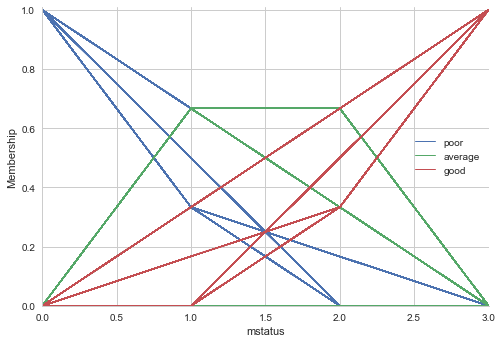

In [57]:
mstatus.view()

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


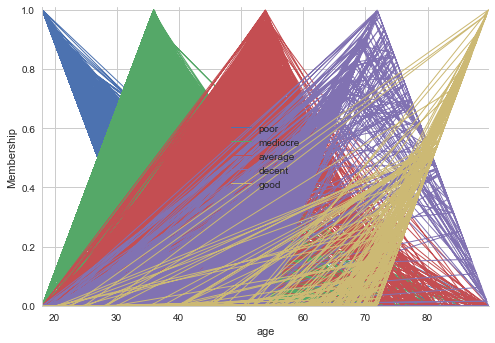

In [58]:
age.view()

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


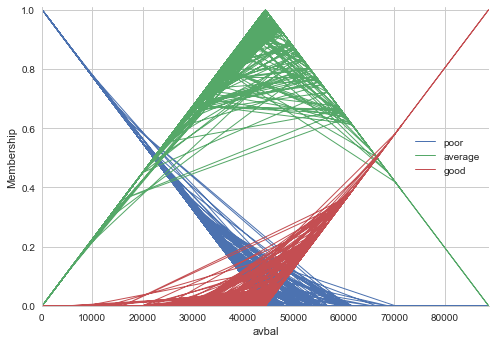

In [59]:
avbal.view()

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


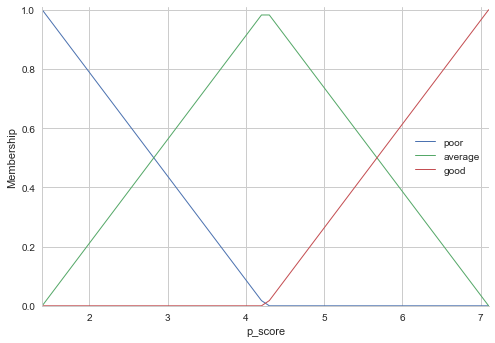

In [53]:
pscore.view()

In [63]:
rule1a = ctrl.Rule(mstatus['poor'], pscore['poor'])
rule1b = ctrl.Rule(mstatus['average'], pscore['average'])
rule1c = ctrl.Rule(mstatus['good'], pscore['good'])

rule2a = ctrl.Rule(age['decent']|age['good'], pscore['poor'])
rule2b = ctrl.Rule(age['poor']|age['average'], pscore['average'])
rule2c = ctrl.Rule(age['mediocre'], pscore['good'])

rule3c = ctrl.Rule(children['poor'], pscore['good'])

rule4a = ctrl.Rule(occupation['poor'], pscore['poor'])
rule4b = ctrl.Rule(occupation['average'], pscore['average'])
rule4c = ctrl.Rule(occupation['good'], pscore['good'])

rule5a = ctrl.Rule(education['poor'], pscore['poor'])
rule5b = ctrl.Rule(education['average'], pscore['average'])
rule5c = ctrl.Rule(education['good'], pscore['good'])

rule6a = ctrl.Rule(income['poor'], pscore['poor'])
rule6b = ctrl.Rule(income['average'], pscore['average'])
rule6c = ctrl.Rule(income['good'], pscore['good'])

rule7a = ctrl.Rule(avbal['poor'], pscore['poor'])
rule7b = ctrl.Rule(avbal['average'], pscore['average'])
rule7c = ctrl.Rule(avbal['good'], pscore['good'])

rule8a = ctrl.Rule(avtrans['poor'], pscore['poor'])
rule8b = ctrl.Rule(avtrans['average'], pscore['average'])
rule8c = ctrl.Rule(avtrans['good'], pscore['good'])


In [86]:
system = ctrl.ControlSystem(rules=[rule1a, rule1b, rule1c, rule2a, rule2b, rule2c, rule3c,\
                                   rule4a, rule4b, rule4c, rule5a, rule5b, rule5c, \
                                   rule6a, rule6b, rule6c, rule7a, rule7b, rule7c, \
                                   rule8a, rule8b, rule8c])

In [90]:
sim = ctrl.ControlSystemSimulation(system, flush_after_run=21 * 21 + 1)

In [95]:
system2 = ctrl.ControlSystem(rules=[rule6a, rule6b, rule6c, rule7a, rule7b, rule7c, \
                                   rule8a, rule8b, rule8c])
sim2 = ctrl.ControlSystemSimulation(system2, flush_after_run=21 * 21 + 1)

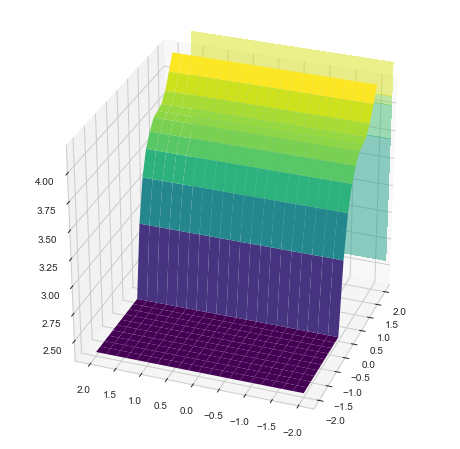

In [69]:
# We can simulate at higher resolution with full accuracy
upsampled = np.linspace(-2, 2, 21)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

# Loop through the system 21*21 times to collect the control surface
for i in range(21):
    for j in range(21):
        sim.input['mstatus'] = x[i, j]
        sim.input['age'] = y[i, j]
        sim.input['children'] = x[i, j]
        sim.input['occupation'] = x[i, j]
        sim.input['education'] = x[i, j]
        sim.input['income'] = x[i, j]
        sim.input['avbal'] = x[i, j]
        sim.input['avtrans'] = x[i, j]
        sim.compute()
        z[i, j] = sim.output['p_score']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)

In [91]:
#test
sim.input['mstatus'] = 3
sim.input['age'] = 33.02
sim.input['children'] = 0
sim.input['occupation'] = 3
sim.input['education'] = 1
sim.input['income'] = 3850.28 
sim.input['avbal'] = 31352.36 
sim.input['avtrans'] = 1976.96

sim.compute()

In [92]:
print(sim.output['p_score'])

4.37035891994


/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


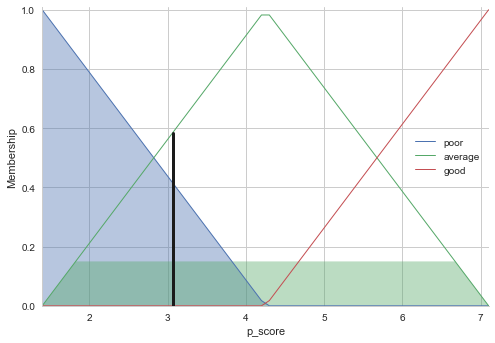

In [81]:
pscore.view(sim=sim)

In [83]:
dfTrain[3000:3001]

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status,p_score,mstatus_c,occupation_c,education_c
index,,,,,,,,,,,,,,
1212,M,single,33.02,0,IT,tertiary,3850.28,31352.36,1976.96,None,3.9,3,3,1


In [98]:
dfTrain.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status,p_score,mstatus_c,occupation_c,education_c
index,,,,,,,,,,,,,,
3085,F,widowed,84.12,1,retired,secondary,692.33,3542.30,667.19,None,1.4,0,0,0
3717,F,married,65.04,2,retired,secondary,1509.65,2366.30,284.93,None,1.5,1,0,0
4638,M,widowed,89.79,1,retired,secondary,889.28,2854.65,836.53,None,1.5,0,0,0
1381,F,widowed,68.59,1,retired,postgrad,2805.67,4519.43,218.95,None,1.6,0,0,2
2526,F,widowed,85.47,1,retired,secondary,591.67,9476.36,730.47,None,1.6,0,0,0


In [99]:
#test
sim2.input['income'] = 692.33 
sim2.input['avbal'] = 3542.30  
sim2.input['avtrans'] = 667.19

sim2.compute()
print(sim2.output['p_score'])

3.06938356466


In [108]:
for idx, row in dfTrain.iterrows():
    sim.input['mstatus'] = row['mstatus_c']
    sim.input['age'] = row['age']
    sim.input['children'] = row['children']
    sim.input['occupation'] = row['occupation_c']
    sim.input['education'] = row['education_c']
    sim.input['income'] = row['income']
    sim.input['avbal'] = row['avbal'] 
    sim.input['avtrans'] = row['avtrans']

    sim.compute()
    dfTrain.set_value(idx,'cal_score',sim.output['p_score'])

In [109]:
dfTrain.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status,p_score,mstatus_c,occupation_c,education_c,cal_score
index,,,,,,,,,,,,,,,
3085,F,widowed,84.12,1,retired,secondary,692.33,3542.30,667.19,None,1.4,0,0,0,3.067909
3717,F,married,65.04,2,retired,secondary,1509.65,2366.30,284.93,None,1.5,1,0,0,3.728479
4638,M,widowed,89.79,1,retired,secondary,889.28,2854.65,836.53,None,1.5,0,0,0,3.186882
1381,F,widowed,68.59,1,retired,postgrad,2805.67,4519.43,218.95,None,1.6,0,0,2,3.870831
2526,F,widowed,85.47,1,retired,secondary,591.67,9476.36,730.47,None,1.6,0,0,0,3.250010


In [111]:
dfTrain[3900:3905]

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status,p_score,mstatus_c,occupation_c,education_c,cal_score
index,,,,,,,,,,,,,,,
4371,F,widowed,59.52,0,finance,professional,10900.87,36457.10,7134.18,None,5.4,0,6,3,4.250000
2727,M,single,28.19,0,IT,professional,11698.78,42661.91,4939.44,None,5.4,3,3,3,4.600788
3570,F,single,28.16,0,finance,professional,9378.53,16793.72,7824.00,None,5.4,3,6,3,4.374517
3213,F,married,32.82,1,IT,professional,14417.33,33815.58,5330.74,A,5.4,1,3,3,4.609301
4036,M,married,29.22,1,construct,postgrad,10045.11,53157.56,3999.99,A,5.4,1,2,2,4.073293


In [112]:
dfTarget

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,decision
index,,,,,,,,,,
1004,F,divorced,25.02,1,legal,postgrad,10136.44,26690.01,4143.04,B
1009,F,married,44.65,2,IT,tertiary,5825.72,22830.97,1196.25,A
1012,F,married,39.61,0,legal,secondary,4836.80,19294.20,832.48,A
1018,F,married,39.11,1,legal,postgrad,12563.13,29157.55,5941.43,A
1031,M,married,45.44,1,government,tertiary,3970.17,16069.47,526.99,A
1039,M,married,61.52,0,finance,professional,11608.79,27529.23,2803.96,A
1045,F,married,28.62,2,legal,postgrad,10001.84,40463.27,4705.42,A
1046,M,married,27.25,0,finance,postgrad,10363.69,30011.80,4792.02,A
1064,F,married,25.01,0,legal,postgrad,6721.91,39752.21,4669.36,A


In [113]:
dfTarget['mstatus_c'] = dfTarget['mstatus'].map({'widowed': 0, 'married': 1, 'divorced': 2, 'single': 3})
dfTarget['occupation_c'] = dfTarget['occupation'].map({'retired': 0, 'education': 1, 'construct': 2, 'IT': 3, \
                                               'manuf': 4, 'government': 5, 'finance': 6, 'medicine': 8, 'legal': 9})
dfTarget['education_c'] = dfTarget['education'].map({'secondary': 0, 'tertiary': 1, 'postgrad': 2, 'professional': 3})

for idx, row in dfTarget.iterrows():
    sim.input['mstatus'] = row['mstatus_c']
    sim.input['age'] = row['age']
    sim.input['children'] = row['children']
    sim.input['occupation'] = row['occupation_c']
    sim.input['education'] = row['education_c']
    sim.input['income'] = row['income']
    sim.input['avbal'] = row['avbal'] 
    sim.input['avtrans'] = row['avtrans']

    sim.compute()
    dfTarget.set_value(idx,'cal_score',sim.output['p_score'])

In [118]:
dfTargetSorted = dfTarget.sort_values(by=['cal_score'], ascending=False)
dfTargetFinal = dfTargetSorted.head(400)
dfTargetFinal.shape

(400, 14)

In [120]:
dfTargetFinal = pd.concat([dfTargetFinal, dfActual], axis=1, join='inner')
dfTargetFinal.columns

Index(['sex', 'mstatus', 'age', 'children', 'occupation', 'education',
       'income', 'avbal', 'avtrans', 'decision', 'mstatus_c', 'occupation_c',
       'education_c', 'cal_score', 'status',
       'cust Investment Potential Score '],
      dtype='object')

In [122]:
sum_profit = 0
# Calculate expected profit
for idx, row in dfTargetFinal.iterrows():
    if row['decision'] == 'A':
        sum_profit += row['cust Investment Potential Score '] * 0.6
    else:
        sum_profit += row['cust Investment Potential Score ']
sum_profit

1069.3799999999978

In [128]:
sum_profit = 0
# Calculate actual profit
for idx, row in dfTargetFinal.iterrows():
    if (row['status'] == 'A') and (row['decision'] == 'A'):
        sum_profit += row['cust Investment Potential Score '] * 0.6
    elif (row['status'] == 'B') and (row['decision'] == 'B'):
        sum_profit += row['cust Investment Potential Score ']
sum_profit

284.3400000000002

In [125]:
dfActualTarget = dfActual[dfActual['status'] != 'None']
dfActualTarget = dfActualTarget.sort_values(by=['cust Investment Potential Score '], ascending=False)
dfActualTarget = dfActualTarget.head(400)

sum_profit = 0
# Calculate Maximum profit
for idx, row in dfActualTarget.iterrows():
    if row['status'] == 'A':
        sum_profit += row['cust Investment Potential Score '] * 0.6
    elif row['status'] == 'B':
        sum_profit += row['cust Investment Potential Score ']
sum_profit

1188.1400000000008